  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
✅ Dataset loaded
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   

2025-11-04 17:03:03.091966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-04 17:03:04.586460: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-04 17:03:08.245511: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-04 17:03:10.261244: E external/local_xl

✅ Training complete

🎯 Test Accuracy: 0.860


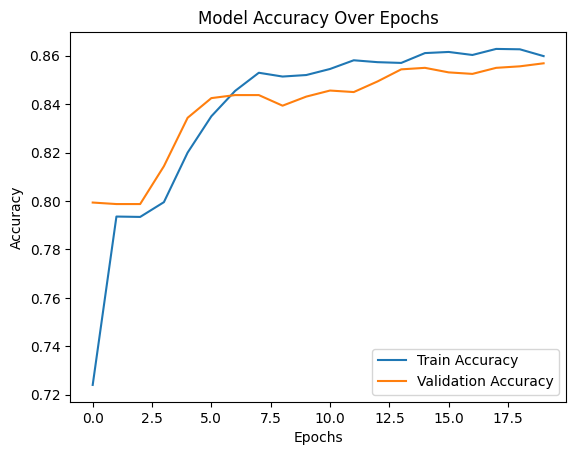

In [4]:

# %pip install -q kagglehub tensorflow scikit-learn pandas numpy matplotlib seaborn


# ---------------------------------
# 2. Load and Preprocess Dataset
# ---------------------------------
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv")
print("✅ Dataset loaded")
print(df.head())

# Drop unnecessary columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------
# 3. Build Neural Network Classifier
# ---------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
print("✅ Training complete")

# ---------------------------------
# 4. Evaluate Model
# ---------------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🎯 Test Accuracy: {acc:.3f}")

# ---------------------------------
# 5. Visualize Training Performance
# ---------------------------------
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
import numpy as np
import pandas as pd

# Create input as DataFrame (matching training columns)
new_customer = pd.DataFrame({
    'CreditScore': [619],
    'Geography': ['France'],
    'Gender': ['Female'],
    'Age': [42],
    'Tenure': [2],
    'Balance': [0],
    'NumOfProducts': [1],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [101348.88]
})

# Apply same preprocessing as training
new_customer = pd.get_dummies(new_customer, columns=['Geography', 'Gender'], drop_first=True)

# Ensure all columns match the training data
for col in X.columns:
    if col not in new_customer.columns:
        new_customer[col] = 0
new_customer = new_customer[X.columns]  # align order

# Scale it using the same scaler
new_customer_scaled = scaler.transform(new_customer)

# Predict
pred_prob = model.predict(new_customer_scaled)
pred_class = (pred_prob > 0.5).astype("int")

print(f"Predicted probability of churn: {pred_prob[0][0]:.2f}")
print("Customer will churn" if pred_class[0][0] == 1 else "Customer will stay")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted probability of churn: 0.34
Customer will stay
